In [3]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-structure-sparseband)

```{index} ! Julia; spdiagm
```

The `scipi.sparse.diags` function creates a sparse matrix given its diagonal elements and the diagonal indexes to put them on. The main or central diagonal is numbered zero, above and to the right of that is positive, and below and to the left is negative.

In [4]:
import scipy.sparse as sp
n = 50
data = [n * ones(n-3), ones(n), linspace(-1, 1-n, n-1)]
offsets = [-3, 0, 1]    # 3rd below, main, 1st above
A = sp.diags(data, offsets, format="lil")
print(A[:7, :7].todense())

[[ 1. -1.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  0.  0.  0.  0.]
 [ 0.  0.  1. -3.  0.  0.  0.]
 [50.  0.  0.  1. -4.  0.  0.]
 [ 0. 50.  0.  0.  1. -5.  0.]
 [ 0.  0. 50.  0.  0.  1. -6.]
 [ 0.  0.  0. 50.  0.  0.  1.]]


Without pivoting, the LU factors have the same lower and upper bandwidth as the original matrix.

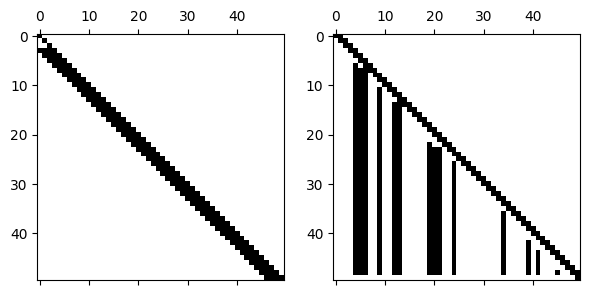

In [5]:
L, U = FNC.lufact(A.todense())
subplot(1, 2, 1), spy(L)
subplot(1, 2, 2), spy(U);

However, if we introduce row pivoting, bandedness may be expanded or destroyed.

(<Axes: >, <matplotlib.image.AxesImage at 0x12c174f50>)

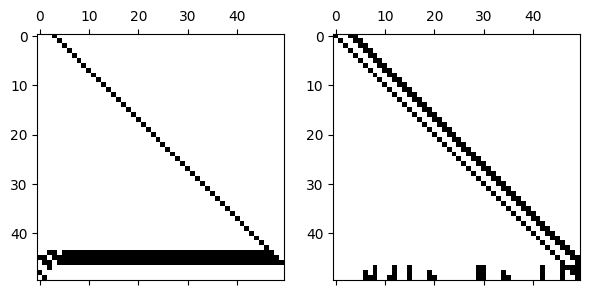

In [6]:
L, U, p = FNC.plufact(A.todense())
subplot(1, 2, 1), spy(L[p, :])
subplot(1, 2, 2), spy(U)